__Goal : To find if customer will churn or not__

Why balancing the dataset is important ?
In the datasets like customer churn, device failure, cancer prediction the dataset is always imbalanced.
The rate of customer churn, device failure, cancer patients is usually low. So when such dataset is provided for training-
The traing data provided contains very less value of such particular class. So model doesn't have much to learn from it.There is a huge bias in the dataset which should be solved to get the exact predictions.

Important Note: First divide into train / test, and then perform operations only on the training set, and the test set should be without any changes.In Method 1,2 and 3 test data is also considered for balancing which is not required .

1. Initially we will solve using unbalanced dataset
2. Later we will solve using balanced dataset using different methods.
    
    Classifier Type problem. Solving using Logistic regression.relu for hidden layers. Sigmoid for output layers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

__Importing the dataset__

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.iloc[488]['TotalCharges']

' '

__data cleaning__

In [5]:
df.drop('customerID', axis= 'columns', inplace = True) # Customer Id is useless Drop it.

In [6]:
df.dtypes # Printing the datatypes for each column. We want them all to be in a form of integer or floats. Max are objects.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values # Observe that TotalCharges are all strings(objects). Convert them to numbers. 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') 
# This will ignore the spaces values and print NA before it while converting the rest of them to number format. 
# We just created series converted to integers, but to create a dataframe we need a boolean output of index. Refer next cell

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull() 
# Will return true if NA. Also creates a boolean output of index, which can be used to make a dataframe.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
type(pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()) # Returns a pandas series

pandas.core.series.Series

In [11]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull().dtype # Returns a boolean output

dtype('bool')

In [12]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull().shape

(7043,)

In [13]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()] 
# Returns only those cells where pandas series returned a True Output.Observe the total charges being blank. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()].shape
#11 rows and 20 columsn as o/p is too small compared to a dataset with 7043 rows. 
# So we can drop them rather than filling them with any arbitrary value.

(11, 20)

In [15]:
df.iloc[488] # At 488th index we can see that the total charges are blank.

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
df.iloc[488]['TotalCharges'] # Blank! right from start!

' '

In [17]:
df.TotalCharges!= ' ' # creating dataframe using series index 

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: TotalCharges, Length: 7043, dtype: bool

In [18]:
df1 = df[df.TotalCharges!= ' '] # Dropping the blank rows in totalcharges.

In [19]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()]  
# Observe we do not get any True values in return where Total Charges are kept as blank. Ignore !

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\381103626.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .notnull()] ## For notnull returned the whole dataframe. Ignore !

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\3739056534.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .notnull()] ## For notnull returned the whole dataframe. Ignore !


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
df1.shape

(7032, 20)

In [23]:
df1.dtypes
# Total charges displays datatype as object. All the blanks been removed.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [24]:
# Trying to convert again to the numeric values after removing all the blanks. Observe the dtype is float64
pd.to_numeric(df1.TotalCharges)
# Returns pandas series to assign to the respective columns

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [25]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) 
# Saving it to the total charges columns. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\2045078584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [26]:
df1.TotalCharges.dtypes

dtype('float64')

In [27]:
df1.dtypes
# Observe the TotalCharges changed to float.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

__A quick Visualization for tenure__

In [28]:
df1.Churn=='No' # Returns index boolean of true and false. only true index is accepted inside the dataframe arguement.

0        True
1        True
2       False
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041    False
7042     True
Name: Churn, Length: 7032, dtype: bool

In [29]:
(df1.Churn=='No').dtypes #Returns pandas series of bool type

dtype('bool')

In [30]:
df1[df1.Churn=='No'] # Returns dataset where churn is set at value = No

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [31]:
type(df1.where((df1['gender']=='Female') & (df1['Partner']=='Yes'))) # Check

pandas.core.frame.DataFrame

In [32]:
df1[(df1.Churn=='No') & (df1.gender == 'Female')].tenure # Check

0        1
7       10
15      69
16      52
19      21
        ..
7030     2
7036    12
7037    72
7039    72
7040    11
Name: tenure, Length: 2544, dtype: int64

In [33]:
df1[df1.Churn=='No'].tenure # Returns pandas series of tenure column only where the churn is set at value 'No'.

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [34]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
# Saving the variable format of pandas series returned for Yes and No
# Creates a separate dataframe based on the index returned.

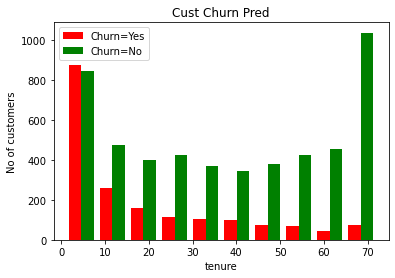

In [35]:
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red','green'],label = ['Churn=Yes','Churn=No'])

plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.title("Cust Churn Pred")
plt.legend()
# Plotting the churn histogram
# We can observe that the tenured customer is not leaving indicated by green.

__A quick Visualization for monthly charges__

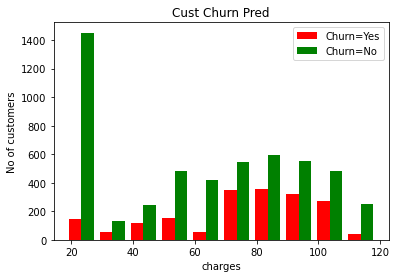

In [36]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no], color = ['red','green'],label = ['Churn=Yes','Churn=No'])

plt.xlabel("charges")
plt.ylabel("No of customers")
plt.title("Cust Churn Pred")
plt.legend()

__As we can see that most of our columns are in the format yes or No. So we need to bring them in a format of numbers 0 or 1__ 

In [37]:
df['gender'].unique() # Returns numpy array.
# Printing the unique entries

array(['Female', 'Male'], dtype=object)

In [38]:
df['gender'].unique # Returns pandas series.Same as below but Observe the index

<bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>

In [39]:
df['gender'] # Returns pandas series. Same as above. Observe the index

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [40]:
# Implementing for loop for printing all the individual entries in each of the respective columns.
def unique_col_values(df):
    for i in df:
        if df[i].dtypes == 'object': ## To skip the numeric dtypes. We need not work on them. 
            print (f'{i} : {df[i].unique()}')  # here df.[]unique() above df[].unique

__As  we see below that our dataset contains objects to a greater extent. We somehow need to deal with this kind of data and try to convert each of the values in the form of numeric.__

In [41]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


__For OnlineSecurity, DeviceProtection, StreamingTV we can see the value as 'No internet service' which can be replaced by 'No'. Its one and the same thing.__

In [42]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\494651664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\494651664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [43]:
unique_col_values(df1) # Observe the changes reflected.

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [44]:
list(df1.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [45]:
df1.columns
# type(df1.columns) # Returns pandas series

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
df1.columns.values #CHECK
# type(df1.columns.values) # Returns numpy array

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [47]:
df1.gender.dtypes # Both are same # CHECK
# df['gender'].dtypes  # Both are same 

dtype('O')

In [48]:
df1['gender'].unique() # Prints the unique values only while df1.gender.values returns all values

array(['Female', 'Male'], dtype=object)

In [49]:
df1.gender.unique()

array(['Female', 'Male'], dtype=object)

In [50]:
df1.gender.values # Returns all values while df1['gender'].unique() returns only unique values.

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [51]:
df1.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
df1.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [53]:
len(df1.columns)

20

In [54]:
df1.shape
# df1.shape[1] # Returns the number of columns 

(7032, 20)

In [55]:
df1.MonthlyCharges.dtype

dtype('float64')

In [56]:
def print_yes_no_columns (df1):
    list =[]
    for i in df1:
#         if df1[i].dtypes =='object':
        if 'Yes'  in df1[i].unique() and 'No'  in df1[i].unique() :
            list.append(i)
    return list

In [57]:
yes_no_list = print_yes_no_columns(df1)
yes_no_list
# len(some_list)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\3070170871.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Yes'  in df1[i].unique() and 'No'  in df1[i].unique() :


['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [58]:
# Written Manually before automating in the above line.
yes_no_columns = ['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [59]:
# Replacing using each column individually
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\1493105626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)


In [60]:
unique_col_values(df1) # Shows only object type, as set in above function

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [61]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True) # can also be written in separate lines.

C:\Users\DELL\AppData\Local\Temp\ipykernel_4480\1264069665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True) # can also be written in separate lines.


In [62]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [63]:
# checking the values of columns
for column in df1:
    print (f'{column} : {df1[column].unique()}') 

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [64]:
unique_col_values(df1) # Shows only object type, as set in above function

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


__Till here we tried to clean all the data that contained non numeric values. Above columns canot be converted to numeric values, but each column type can be separated out for the binary output.__

In [65]:
def print_hot_encoding_columns (df1):
    list =[]
    for i in df1:
        if df1[i].dtypes =='object': ## All the remaining columns are object only.We can get a list out of that.
#         if 'Yes'  not in df1[i].unique() and 'No'  not in df1[i].unique() :
            list.append(i)
    return list

In [66]:
hot_encoding_list = print_hot_encoding_columns(df1)
hot_encoding_list # This variable can be used in below line instead of manually entering.
# len(some_list)

['InternetService', 'Contract', 'PaymentMethod']

In [67]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract','PaymentMethod'])

In [68]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [69]:
df2.dtypes # ALL data types are numeric

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

__Scaling data using sklearns minmax scaler__

In [70]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [71]:
def print_non_one_zero_columns (df):
    list =[]
    for i in df:
#         if df1[i].dtypes =='object': ## All the remaining columns are object only.We can get a list out of that.
        if (0 not in df[i].unique() or 1 not in df[i].unique()) :
#         if  0 not in df[i].unique() :
            list.append(i)
    return list

In [72]:
non_one_zero_list = print_non_one_zero_columns(df2)
non_one_zero_list # This variable can be used in below line instead of manually entering.
# len(some_list)

['tenure', 'MonthlyCharges', 'TotalCharges']

In [73]:
df2.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [74]:
0 in df2.tenure.unique()

False

In [75]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [77]:
# Observe the tenure , mionthly charges, total charges columns scaled to range between 0-1.
for column in df2:
    print (f'{column} : {df2[column].unique()}')  # here df.[]unique() above df[].unique

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

__Data is clean now.
Train_Test Splitting__
       
       No null values
       Objects converted to integers/Float/binary
       Data scaled between 0 to 1
__Ready for Train test split__
       

In [78]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [80]:
X_train.shape

(5625, 26)

In [81]:
X_test.shape

(1407, 26)

In [82]:
y_train.shape

(5625,)

In [83]:
y_test.shape

(1407,)

In [84]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential ([
    keras.layers.Dense (200,input_shape= (26,), activation = 'relu'),
    keras.layers.Dense (100, activation = 'relu'),
    keras.layers.Dense (1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit (X_train, y_train,epochs = 300)

Epoch 1/300
176/176 [==============================] - 2s 3ms/step - loss: 0.4445 - accuracy: 0.7899
Epoch 2/300
176/176 [==============================] - 1s 3ms/step - loss: 0.4134 - accuracy: 0.8036
Epoch 3/300
176/176 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8064
Epoch 4/300
176/176 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8121
Epoch 5/300
176/176 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8130
Epoch 6/300
176/176 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8146
Epoch 7/300
176/176 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8149
Epoch 8/300
176/176 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8187
Epoch 9/300
176/176 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8203
Epoch 10/300
176/176 [==============================] - 1s 4ms/step - loss: 0.3808 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9468
Epoch 161/300
176/176 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9456
Epoch 162/300
176/176 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9488
Epoch 163/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9470
Epoch 164/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9454
Epoch 165/300
176/176 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9506
Epoch 166/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9493
Epoch 167/300
176/176 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.9493
Epoch 168/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.9486
Epoch 169/300
176/176 [==============================] - 0s 2ms/step - loss: 0.1021 - a

In [85]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.5123 - accuracy: 0.7363


[1.5123300552368164, 0.7363184094429016]

In [86]:
yp= model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 2ms/step


array([[3.3787570e-03],
       [1.1613077e-02],
       [9.1679149e-06],
       [9.8056883e-01],
       [3.7479419e-02],
       [9.9970454e-01],
       [1.2153706e-08],
       [2.7608697e-03],
       [8.3154064e-01],
       [2.3398318e-04]], dtype=float32)

In [87]:
y_test_list = list(y_test)

In [88]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [89]:
y_pred[0:20]

[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]

In [90]:
y_test.shape

(1407,)

In [91]:
y_test.count()

1407

In [92]:
cm= tf.math.confusion_matrix(y_test_list,y_pred) # Using tensorflow.

Text(69.0, 0.5, 'True')

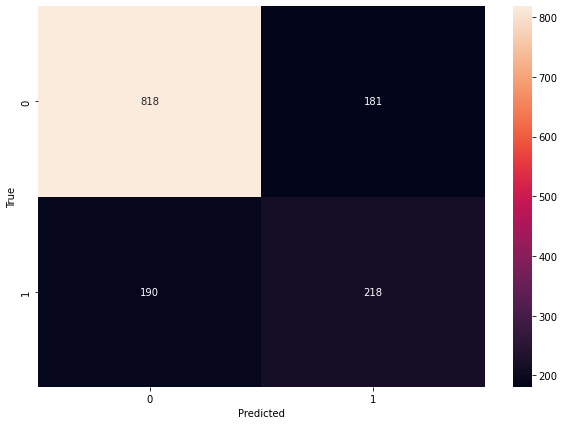

In [93]:
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       999
           1       0.55      0.53      0.54       408

    accuracy                           0.74      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.73      0.74      0.74      1407



In [95]:
confusion_matrix(y_test,y_pred) # using sklearn

array([[818, 181],
       [190, 218]], dtype=int64)

## V21- Handling Imbalanced dataset

    At times the categorical dataset is too much unbalanced.

In [96]:
df2.Churn.unique()

array([0, 1], dtype=int64)

In [97]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [98]:
count_class_0,count_class_1 =  df2.Churn.value_counts()

In [99]:
count_class_0

5163

In [100]:
count_class_1

1869

__Distributing the dataframes in two different segments of 0 and 1__

In [101]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [102]:
df2['Churn']==0

0        True
1        True
2       False
3        True
4       False
        ...  
7038     True
7039     True
7040     True
7041    False
7042     True
Name: Churn, Length: 7032, dtype: bool

In [103]:
df2[df2['Churn']==0].shape

(5163, 27)

In [104]:
df2.shape

(7032, 27)

In [105]:
df_class_0 = df2[df2['Churn']==0]
df_class_0['Churn'].value_counts() # Only 1 class i.e. 0 with 5163 no of elements.

0    5163
Name: Churn, dtype: int64

In [106]:
df_class_1 = df2[df2['Churn']==1]
df_class_1['Churn'].value_counts() # Only 1 class i.e. 0 with 1869 no of elements.

1    1869
Name: Churn, dtype: int64

In [107]:
df_class_0.shape

(5163, 27)

In [108]:
df_class_1.shape

(1869, 27)

## Method1 - Undersampling

__Undersampling the df_class_0 to match 1869 rows of df_class_1__
    
    It uses certain portion of the majority class and discards the rest. Complete data is not considered.
    Using ensembling shown later in method4 overcomes this problem which uses randomforest.
    Creating the same size of dataset to contain equal number of values for 0 and 1. 

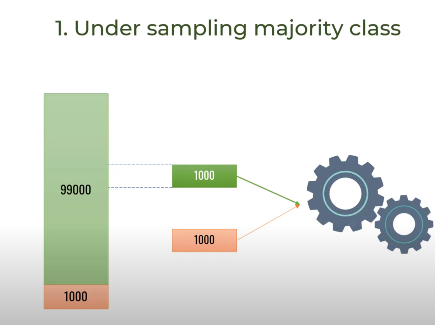

In [109]:
df_class_0.sample(2)  # Prints random samples with size equal to number enter.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3882,0,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2870,0,0,1,0,0.788732,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [110]:
df_class_0.sample(count_class_1).shape ## Here we undersampled the 0th class.

(1869, 27)

In [111]:
df_class_0_under = df_class_0.sample(count_class_1)

In [112]:
df_class_0_under.shape # Matches with df_class_1.shape--> (1869, 27)

(1869, 27)

In [113]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)   #Combining the 2 datarames in 1 df.
df_test_under.shape # 1869*2 = 3738 

(3738, 27)

In [114]:
df_test_under['Churn'].value_counts() # Equal number of 1's and 0's in dataset. Bias is removed.

0    1869
1    1869
Name: Churn, dtype: int64

In [115]:
X = df_test_under.drop(['Churn'], axis = 'columns')
y = df_test_under['Churn']

In [116]:
X.shape

(3738, 26)

In [117]:
y.shape

(3738,)

In [118]:
y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

__Now we have equal binary output for y. While splitting the data into train and test, we need to make sure that those binaries are distributed evenly, among the train and test data as well. Splitting the data using sklearn's stratify.

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2, stratify = y) # Stratified shuffle split in one function.
# X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2) # Check the output below when shuffle split is not used.

In [120]:
def shape_print (X_train,X_test,y_train,y_test):
    list = [X_train,X_test,y_train,y_test]
    list1 = ['X_train','X_test','y_train','y_test']
    for i,j in zip(list,list1):
        print(f'{j} : {i.shape}')
#         return i.shape

In [121]:
shape_print(X_train,X_test,y_train,y_test)

X_train : (2990, 26)
X_test : (748, 26)
y_train : (2990,)
y_test : (748,)


In [122]:
def value_counts(y_train,y_test):
    print (y_train.value_counts())
    print (y_test.value_counts())

In [123]:
value_counts(y_train,y_test) # Binary output distributed in equal ratio. See the output below when strat is not used 

1    1495
0    1495
Name: Churn, dtype: int64
0    374
1    374
Name: Churn, dtype: int64


__Predicting using a balanced dataset. Precison, recall and F1 will be compared with imbalanced data__

In [124]:
import tensorflow as tf
from tensorflow import keras
model1 = keras.Sequential ([
    keras.layers.Dense (200,input_shape= (26,), activation = 'relu'),
    keras.layers.Dense (100, activation = 'relu'),
    keras.layers.Dense (1,activation = 'sigmoid')
])

model1.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model1.fit (X_train, y_train,epochs = 300)

Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 0.5355 - accuracy: 0.7358
Epoch 2/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7652
Epoch 3/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.7696
Epoch 4/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7716
Epoch 5/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7759
Epoch 6/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7819
Epoch 7/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7870
Epoch 8/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.7870
Epoch 9/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.7970
Epoch 10/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.7953
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.9388
Epoch 84/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9375
Epoch 85/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9381
Epoch 86/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9401
Epoch 87/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9381
Epoch 88/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1323 - accuracy: 0.9388
Epoch 89/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9418
Epoch 90/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9388
Epoch 91/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.9375
Epoch 92/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1341 - accuracy: 0.9415
Epoch 93/300


94/94 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9528
Epoch 246/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9492
Epoch 247/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9545
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9562
Epoch 249/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9522
Epoch 250/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9508
Epoch 251/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9498
Epoch 252/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9515
Epoch 253/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9565
Epoch 254/300
94/94 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9498
Epoc

In [125]:
model1.evaluate(X_test,y_test)

24/24 [==============================] - 0s 2ms/step - loss: 1.9706 - accuracy: 0.6952


[1.9706226587295532, 0.6951871514320374]

In [126]:
yp1= model1.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [127]:
y_pred1 = []
for i in yp1:
    if i>0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [128]:
y_pred1

[0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


__We can see a noticable change in precison, recall and f1 score after the dataset was balanced.

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       374
           1       0.70      0.69      0.69       374

    accuracy                           0.70       748
   macro avg       0.70      0.70      0.70       748
weighted avg       0.70      0.70      0.70       748



## Method2 - Oversampling

__Oversampling the class 1 to match class 0__

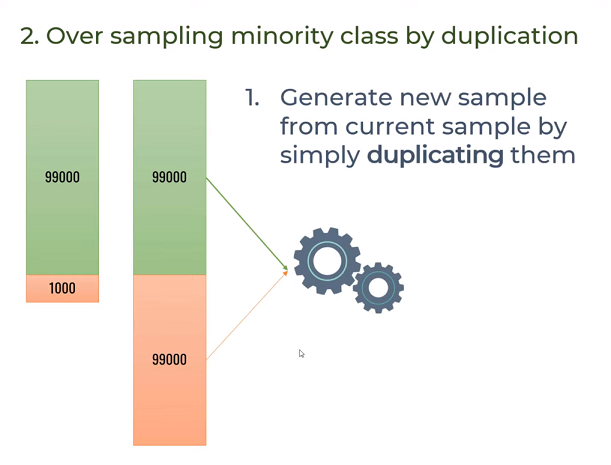

In [130]:
count_class_0,count_class_1

(5163, 1869)

In [131]:
df_class_0.shape

(5163, 27)

In [132]:
df_class_1.shape

(1869, 27)

In [133]:
df_class_1.sample(2) #generates any random index for the input digit.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5090,0,1,1,0,0.084507,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
1056,1,0,0,0,0.056338,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [134]:
df_class_1.sample(count_class_0, replace = True).shape
#Oversampling 1 to match the number of 0.Replace = 'True' required while oversampling. Undesampling works fine w/0 replace.
# Oversampling throws this error : ValueError: Cannot take a larger sample than population when 'replace=False'

(5163, 27)

In [135]:
df_class_1.sample(count_class_0, replace = True).shape

(5163, 27)

In [136]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_class_1_over.shape

(5163, 27)

In [137]:
# df_class_1_over.Churn.value_counts()  # Same output for both
df_class_1_over['Churn'].value_counts() # Same output for both

1    5163
Name: Churn, dtype: int64

In [138]:
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0) #Combining the two dataframes 
df_test_over.shape

(10326, 27)

In [139]:
df_test_over.Churn.value_counts() # 1 is oversampled. 0 and 1 equally distributed.

0    5163
1    5163
Name: Churn, dtype: int64

In [140]:
X = df_test_over.drop(['Churn'],axis = 'columns')
y = df_test_over['Churn']

In [141]:
X.shape

(10326, 26)

In [142]:
y.shape

(10326,)

In [143]:
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [145]:
shape_print(X_train,X_test,y_train,y_test)

X_train : (8260, 26)
X_test : (2066, 26)
y_train : (8260,)
y_test : (2066,)


In [146]:
value_counts(y_train,y_test) # When Strat is  used

1    4130
0    4130
Name: Churn, dtype: int64
0    1033
1    1033
Name: Churn, dtype: int64


In [147]:
import tensorflow as tf
from tensorflow import keras
model1 = keras.Sequential ([
    keras.layers.Dense (200,input_shape= (26,), activation = 'relu'),
    keras.layers.Dense (100, activation = 'relu'),
    keras.layers.Dense (1,activation = 'sigmoid')
])

model1.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model1.fit (X_train, y_train,epochs = 300)

Epoch 1/300
259/259 [==============================] - 1s 2ms/step - loss: 0.5066 - accuracy: 0.7507
Epoch 2/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7700
Epoch 3/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4678 - accuracy: 0.7724
Epoch 4/300
259/259 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7801
Epoch 5/300
259/259 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.7906
Epoch 6/300
259/259 [==============================] - 1s 2ms/step - loss: 0.4301 - accuracy: 0.7955
Epoch 7/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8007
Epoch 8/300
259/259 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.8131
Epoch 9/300
259/259 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8168
Epoch 10/300
259/259 [==============================] - 1s 2ms/step - loss: 0.3814 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9534
Epoch 161/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9516
Epoch 162/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1049 - accuracy: 0.9513
Epoch 163/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1048 - accuracy: 0.9533
Epoch 164/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9536
Epoch 165/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9542
Epoch 166/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9540
Epoch 167/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9545
Epoch 168/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9548
Epoch 169/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1007 - a

In [148]:
model1.evaluate(X_test,y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.9237 - accuracy: 0.8591


[0.9236763119697571, 0.8591480851173401]

In [149]:
yp1= model1.predict(X_test)

65/65 [==============================] - 0s 2ms/step


In [150]:
yp1

array([[5.0836945e-01],
       [9.9783897e-01],
       [9.9983811e-01],
       ...,
       [9.3294638e-01],
       [9.9072921e-01],
       [8.2782510e-04]], dtype=float32)

In [151]:
yp1 = np.round(yp1)

In [152]:
yp1

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [153]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,yp1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1033
           1       0.82      0.91      0.87      1033

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



__Initially as number of 0's were more, only 0 class performed better. After oversampling we can see a improvements in the recall and f1 score of class 1.__ 

__Creating a function to create a model,compile, fit , evaluate, predict and print a confusion matrix__

In [154]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [155]:
def ANN(X_train,y_train,X_test,y_test,loss):
    model = keras.Sequential ([
        keras.layers.Dense (200,input_shape= (26,), activation = 'relu'),
        keras.layers.Dense (100, activation = 'relu'),
        keras.layers.Dense (1,activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam',
                 loss = loss,
                 metrics = ['accuracy'])

    model.fit (X_train, y_train,epochs = 300)
    
    print(model.evaluate(X_test,y_test))
    
    y_pred= model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print ("Classification Report:")
    print (classification_report(y_test,y_pred))
    
    return y_pred

In [156]:
ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/300
259/259 [==============================] - 1s 2ms/step - loss: 0.5061 - accuracy: 0.7557
Epoch 2/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.7723
Epoch 3/300
259/259 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7768
Epoch 4/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.7832
Epoch 5/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.7893
Epoch 6/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4259 - accuracy: 0.8011
Epoch 7/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8059
Epoch 8/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8134
Epoch 9/300
259/259 [==============================] - 1s 3ms/step - loss: 0.3923 - accuracy: 0.8201
Epoch 10/300
259/259 [==============================] - 1s 3ms/step - loss: 0.3823 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9561
Epoch 161/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9553
Epoch 162/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9557
Epoch 163/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9575
Epoch 164/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9557
Epoch 165/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9531
Epoch 166/300
259/259 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9571
Epoch 167/300
259/259 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9533
Epoch 168/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9551
Epoch 169/300
259/259 [==============================] - 1s 2ms/step - loss: 0.0984 - a

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

## Method 3 -  SMOTE: Synthetic Minority Over-sampling Technique.
       Uses K- Nearest Neigbour Algo using imbalanced-learn library
       pip install -U imbalanced-learn
       conda install -c conda-forge imbalanced-learn

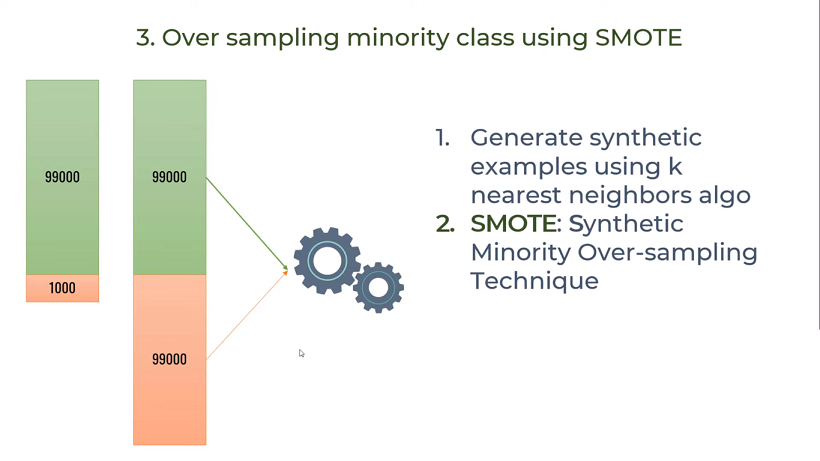

In [157]:
df2.shape

(7032, 27)

In [160]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [159]:
X= df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [161]:
from imblearn.over_sampling import SMOTE

In [163]:
smote = SMOTE(sampling_strategy = "minority")
X_sm , y_sm = smote.fit_sample(X,y)

In [164]:
y_sm.value_counts() # Oversampled 1 using SMOTE

0    5163
1    5163
Name: Churn, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X_sm,y_sm,test_size = 0.2, stratify = y_sm)

In [167]:
shape_print(X_train,X_test,y_train,y_test) # Function created above used here

X_train : (8260, 26)
X_test : (2066, 26)
y_train : (8260,)
y_test : (2066,)


In [172]:
value_counts(y_train,y_test)  # Function created above used here

1    4130
0    4130
Name: Churn, dtype: int64
0    1033
1    1033
Name: Churn, dtype: int64


In [173]:
ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/300
259/259 [==============================] - 2s 3ms/step - loss: 0.4765 - accuracy: 0.7707
Epoch 2/300
259/259 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.7886
Epoch 3/300
259/259 [==============================] - 1s 4ms/step - loss: 0.4292 - accuracy: 0.7989
Epoch 4/300
259/259 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.8068
Epoch 5/300
259/259 [==============================] - 1s 4ms/step - loss: 0.4072 - accuracy: 0.8134
Epoch 6/300
259/259 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8182
Epoch 7/300
259/259 [==============================] - 1s 4ms/step - loss: 0.3833 - accuracy: 0.8281
Epoch 8/300
259/259 [==============================] - 1s 4ms/step - loss: 0.3784 - accuracy: 0.8280
Epoch 9/300
259/259 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8370
Epoch 10/300
259/259 [==============================] - 1s 3ms/step - loss: 0.3607 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.1166 - accuracy: 0.9505
Epoch 161/300
259/259 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9475
Epoch 162/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9508
Epoch 163/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9494
Epoch 164/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9500
Epoch 165/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9500
Epoch 166/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1158 - accuracy: 0.9495
Epoch 167/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9467
Epoch 168/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1178 - accuracy: 0.9493
Epoch 169/300
259/259 [==============================] - 1s 3ms/step - loss: 0.1169 - a

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [174]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.8349


[0.6940093636512756, 0.8349467515945435]

## Method 4 - Use of Ensembling with under sampling
    This method uses undersampling of the majority class
    It considers all the majority class for predictions unlike what we did while undersampling in method1 before.
    Here we are only considerate about the training data while distributing the classes.
    Test data can be of any size. You know why !

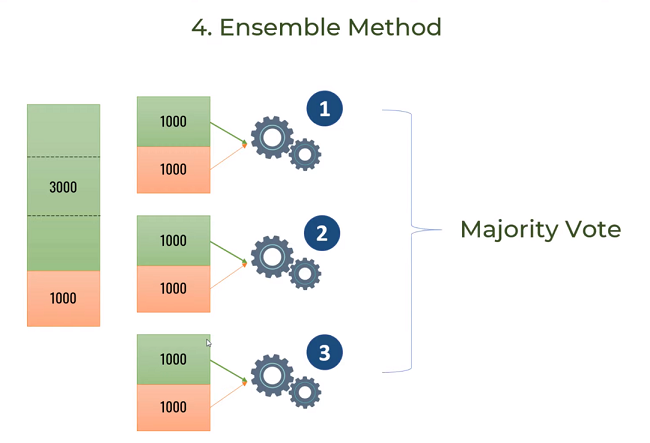

In [175]:
df2.shape

(7032, 27)

In [176]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [177]:
X= df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [179]:
shape_print(X_train,X_test,y_train,y_test) # Function created above used here

X_train : (5625, 26)
X_test : (1407, 26)
y_train : (5625,)
y_test : (1407,)


In [180]:
value_counts(y_train,y_test)  # Function created above used here

0    4130
1    1495
Name: Churn, dtype: int64
0    1033
1     374
Name: Churn, dtype: int64


In [193]:
4130/1033 # SAME RATIO BECAUSE OF STARTIFY in above train_test_split function.

3.9980638915779285

In [194]:
1495/374 # SAME RATIO BECAUSE OF STARTIFY in above train_test_split function.

3.9973262032085564

In [186]:
'Churn' in X_train.columns

False

In [201]:
# Creating a dataframe from training data only to apply ensemble method

In [190]:
df3 = X_train.copy() 
df3['Churn']= y_train #appending churn column to df3 dataframe. 

In [197]:
df3.Churn.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [198]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [200]:
value_counts(df3_class0['Churn'],df3_class1['Churn'])

0    4130
Name: Churn, dtype: int64
1    1495
Name: Churn, dtype: int64


In [204]:
4130/1495

2.762541806020067

__Now our goal is to create 4130/1495 = 2.762541806020067 approx 3 models to take a majority vote.__

    We can achieve that by dividing our majority class into 3 different datasets and concat each of them with minority class.
    This way we can create 3 different training sets and analyse our model on th basis of majority vote.
    Here we can divide our majority class into 3 classes using sample method just as we did before. But that may repeat some of the rows while we use them for generating next training data. 
    Instead we can slice the majority class in linear manner based on the order of their index.
    
    Example (The wrong way): This wont ensure that each training dataset contains unique record. Some may conflict.
    df_train1 = df3_class0.sample(1495)
    df_train2 = df3_class0.sample(1495)
    df_train3 = df3_class0.sample(1140)

__Dataset1__

In [208]:
def get_train_set(majority_class,minority_class,start,end):
    df_train = pd.concat([majority_class[start:end],minority_class],axis = 0) ## For creating a dataframe having equal 0-1
    
    X_train = df_train.drop('Churn',axis = 'columns')
    y_train = df_train['Churn']
    
    return X_train,y_train

In [209]:
X_train,y_train= get_train_set(df3_class0,df3_class1,0,1495)

In [210]:
X_train.shape

(2990, 26)

In [211]:
y_train.shape

(2990,)

In [212]:
y_pred1 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7482
Epoch 2/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7639
Epoch 3/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7645
Epoch 4/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7679
Epoch 5/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.7749
Epoch 6/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7719
Epoch 7/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7796
Epoch 8/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7846
Epoch 9/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7903
Epoch 10/300
94/94 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.7933
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9431
Epoch 84/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 0.9401
Epoch 85/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9371
Epoch 86/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9438
Epoch 87/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.9485
Epoch 88/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 0.9425
Epoch 89/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1273 - accuracy: 0.9431
Epoch 90/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1275 - accuracy: 0.9462
Epoch 91/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9465
Epoch 92/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1228 - accuracy: 0.9438
Epoch 93/300


94/94 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9592
Epoch 246/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9589
Epoch 247/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9579
Epoch 248/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9589
Epoch 249/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9589
Epoch 250/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9632
Epoch 251/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0807 - accuracy: 0.9555
Epoch 252/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9589
Epoch 253/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9605
Epoch 254/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9569
Epoc

__Dataset2__

In [215]:
X_train,y_train= get_train_set(df3_class0,df3_class1,1495,2990)

In [216]:
y_pred2 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/300
94/94 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.7431
Epoch 2/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7706
Epoch 3/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7666
Epoch 4/300
94/94 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7753
Epoch 5/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7799
Epoch 6/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7913
Epoch 7/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7890
Epoch 8/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.7997
Epoch 9/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7943
Epoch 10/300
94/94 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.7960
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.1242 - accuracy: 0.9421
Epoch 84/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1199 - accuracy: 0.9465
Epoch 85/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1258 - accuracy: 0.9435
Epoch 86/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9458
Epoch 87/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9492
Epoch 88/300
94/94 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9495
Epoch 89/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9448
Epoch 90/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9512
Epoch 91/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9482
Epoch 92/300
94/94 [==============================] - 0s 3ms/step - loss: 0.1303 - accuracy: 0.9411
Epoch 93/300


94/94 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.9612
Epoch 246/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 0.9595
Epoch 247/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9602
Epoch 248/300
94/94 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9632
Epoch 249/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9635
Epoch 250/300
94/94 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.9585
Epoch 251/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9642
Epoch 252/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9592
Epoch 253/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9585
Epoch 254/300
94/94 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9619
Epoc

__Dataset3__

In [219]:
X_train,y_train= get_train_set(df3_class0,df3_class1,2990,4130)

In [220]:
y_pred3 = ANN(X_train,y_train,X_test,y_test,"binary_crossentropy")

Epoch 1/300
83/83 [==============================] - 1s 3ms/step - loss: 0.5336 - accuracy: 0.7423
Epoch 2/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.7677
Epoch 3/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4761 - accuracy: 0.7742
Epoch 4/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7761
Epoch 5/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.7860
Epoch 6/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7784
Epoch 7/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7841
Epoch 8/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.7905
Epoch 9/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.7962
Epoch 10/300
83/83 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.7992
Epoch 11/

83/83 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9533
Epoch 84/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9564
Epoch 85/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9533
Epoch 86/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9503
Epoch 87/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.9499
Epoch 88/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9484
Epoch 89/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.9560
Epoch 90/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1148 - accuracy: 0.9567
Epoch 91/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9548
Epoch 92/300
83/83 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9510
Epoch 93/300


83/83 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.9602
Epoch 246/300
83/83 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9636
Epoch 247/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9681
Epoch 248/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9639
Epoch 249/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9639
Epoch 250/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.9636
Epoch 251/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9613
Epoch 252/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9620
Epoch 253/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9620
Epoch 254/300
83/83 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9617
Epoc

In [228]:
y_pred1.shape

(1407, 1)

In [223]:
y_pred2.shape

(1407, 1)

In [222]:
y_pred3.shape

(1407, 1)

__Now we will take the individual votes from each of the predicted values to compare with our true values__
We are trying to generate a final y_pred on the basis of voting from y_pred1,y_pred2,y_pred3

    For that we need to create some logic :
    y_pred1 = 1       y_pred1 = 0        y_pred1 = 1       y_pred1 = 0
    y_pred2 = 1       y_pred2 = 0        y_pred2 = 0       y_pred2 = 1
    y_pred3 = 1       y_pred3 = 0        y_pred3 = 0       y_pred3 = 1
    Addition  3                 0                  1                 2
    y_pred    1                 0                  0                 1
    
    If all are 1 final y_pred will be 1
    If all are 0 final y_pred will be 0
    If any two are 0 final y_pred  will be 0
    If any two are 1 final y_pred  will be 1
    
    So the simple conclusion is anything greater than 1 is 1. We can write a function based on this logic.

In [230]:
y_pred_final = []
for i in range (len(y_pred1)):
    addition = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if addition>1:
#         y_pred_final[i] = 1
        y_pred_final.append(1)
    else:
#         y_pred_final[i] = 0
        y_pred_final.append(0)

In [232]:
len(y_pred_final)

1407

In [233]:
print (classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1033
           1       0.47      0.71      0.56       374

    accuracy                           0.71      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.76      0.71      0.72      1407

